# IFN Tutorial for General Network

by [*Kardi Teknomo*](https://people.revoledu.com/kardi/)

## How to Install


You need to have Python installed. Go to [Pypi.org](https://pypi.org/project/IdealFlowNetwork/) and find IdealFlowNetwork version 1.5.1 (or latest version)

> pip install IdealFlowNetwork

Alternatively, download the zip file from [GitHub](https://github.com/teknomo/IdealFlowNetwork), unzip the file in a folder. 
1. Go to folder *pkg*

> cd *your_folder_name*`/pkg`

2. In command Prompt > `pip install .`
   
> pip install . 

It copies the package files to your Python environment. If you computer does not have pip, check [ensurepip documentation](https://pip.pypa.io/en/stable/installation/#ensurepip)

## Using Ideal Flow Network


After the installation, to use IFN you need to import the module.
To import, you can either use this style:

> `from IdealFlow import Network as net`     # from package import module as alias, or

or this style

> `import IdealFlow.Network as net`         # import package.module as alias

In [145]:
# from IdealFlow import Network as net  # from package import module as alias, or
import IdealFlow.Network as net         # import package.module as alias

n = net.IFN()
print('IFN version:',n.version)
print('Copyright:',n.copyright)

IFN version: 1.5.1
Copyright: © 2018-2024 Kardi Teknomo


### Notations

* A = Adjacency matrix
* B = Incidence matrix
* C = Capacity matrix
* F = Flow matrix
* G = Congestion matrix
* S = Stochastic matrix
* sR = sum of rows
* sC = sum of columns
* kappa = $\kappa$ = total flow in the nework
* pi = $\pi$ = node vector (steady state)
* [m,n] = matrix size

### Terminologies:
* Path = trajectory = node sequence
* Cycle = path that have the same start and end
* Flow = link weight, or node weight

# General Network

The IFN class can be used for a general network, not just for ideal flow types. Using the Ideal Flow Network (IFN), you can create any network (i.e., directed graph) by adding nodes or links.




### Add Link
Begin by adding links by specifying the from node, to node, and optionally, a link weight (flow). The default link weight is 1. When adding a link, the nodes are automatically added. By default, when a link is added, its flow is set to one (if not specified otherwise). You can also explicitly set the link flow by specifying the flow value.

```python
n.add_link(startNode, endNode, linkFlow)
n.add_node(nodeName)
```

In [146]:
n.add_link("a","b",2)
n.add_link("a","c",1)
n.add_link("a","d")
n.add_link("b","c")
n.add_link("b","e",3)
n.add_link("c","e",4)
n.add_link("d","c",5)
n.add_link("e","a",3)

### Add Node
Nodes are created automatically when you add a link. To add an isolated node, you can use 
```python
n.add_node(nodeName)
```

In [147]:
n.add_node('isolated node')

### Show Network

We can show the network 

```python
n.show()
```
The total link flow, $\kappa$, is shown in the network title when displaying the IFN.

#### Layout Options
The available layout options are: None, 'Bipartite', 'Circular', 'Fruchterman', 'Kawai', 'Planar', 'Random', 'Shell', 'Spectral', 'Spiral', and 'Spring'.

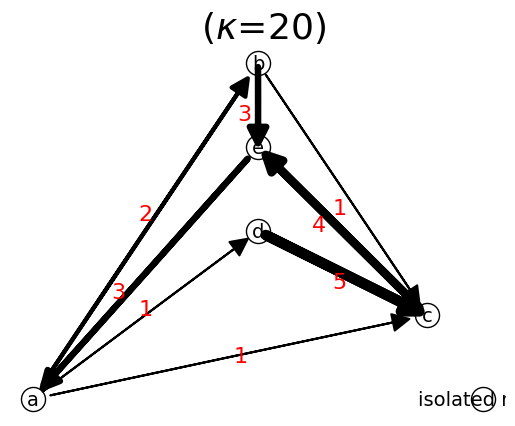

In [148]:
n.show();

### Delete Node

Deleting a node means deleting all the links connecting to that node.
```python
n.delete_node(nodeName)
```

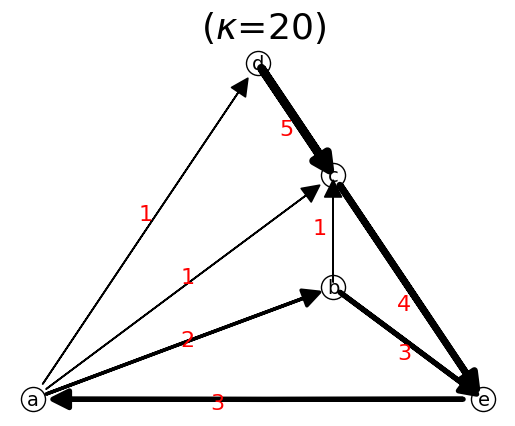

In [149]:
n.delete_node("isolated node")
n.show();    

### Updating Link Flow

If we repeat *add_link* to the existing link, the link flow (i.e. link weight) will be added.

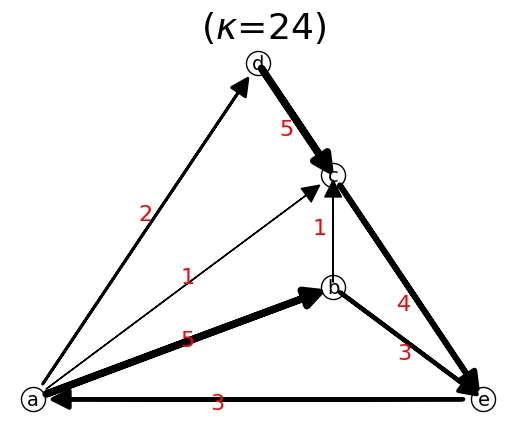

In [150]:
n.add_link("a","d")    # now link a->d has flow of 2
n.add_link("a","b",3)  # now link a->b has flow of 5
n.show();

### Set Link Weight

We can set the link weight directly via *set_link_weight* method.
```python
n.set_link_weight(startNode, endNode, weight)
```

If you just want to add one flow, the following method simplify it.
```python
n.set_link_weight_plus_1(startNode, endNode)
```

Alternatively, we can also set the link weight directly via *set_item* property: 
```python
n[startNode, endNode]=weight
```

In [151]:
n["c","e"]=5
print(n["c","e"])  # prints 5

5


### Get link weight

Link weight can be accessed via *get_item* of the network
```python
n[startNode, endNode]
```

In [152]:
n["c","e"]

5

### Delete Link

To delete a link by specifying the start and end nodes
```python
n.delete_link(fromNode,toNode)
```

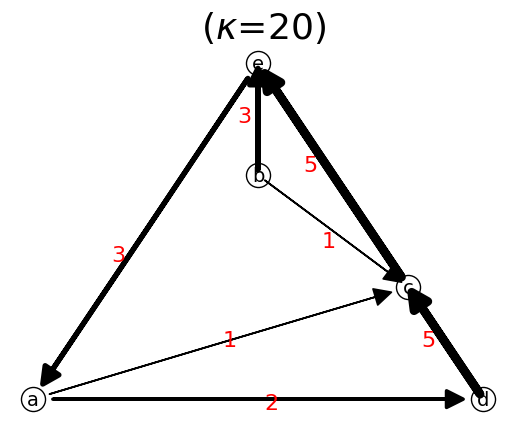

In [153]:
n.delete_link("a","b")
n.show();

### Adjacency List

A network is reprsented by adjacency list or weighted adjacency matrix.

Printing the network would yield the adjacency list
```python
print(n)
```

In [154]:
print('adjacency list =\n',n)

adjacency list =
 {'a': {'c': 1, 'd': 2}, 'b': {'c': 1, 'e': 3}, 'c': {'e': 5}, 'd': {'c': 5}, 'e': {'a': 3}}


### Adjacency matrix

We can also see the weighted adjacency matrix. The matrix is accompanied by the list of nodes in the same order as in the matrix.

```python
matrix, list_node = n.get_matrix()
```

In [155]:
F,list_node=n.get_matrix()
print('matrix =',F,'\n')
print('list of nodes =',list_node,'\n')

matrix = [[0, 0, 1, 2, 0], [0, 0, 1, 0, 3], [0, 0, 0, 0, 5], [0, 0, 5, 0, 0], [3, 0, 0, 0, 0]] 

list of nodes = ['a', 'b', 'c', 'd', 'e'] 



### List of Nodes

To get the list nodes, use *nodes* property.
```python
n.nodes
```

In [156]:
print('nodes =',n.nodes,'\n')

nodes = ['a', 'b', 'c', 'd', 'e'] 



### Nodes Flow

To get of dictionary of flows in each node, use *nodes_flow* property.
```python
n.nodes_flow
```

In [157]:
print('nodes =',n.nodes_flow,'\n')

nodes = {'a': 3, 'b': 4, 'c': 5, 'd': 5, 'e': 3} 



### Total Nodes

The total number of nodes can be access via *total_nodes* property.
```python
n.total_nodes
```

In [158]:
n.total_nodes

5

### List of Links
We list the links in the network via *get_links* property.
```python
n.get_links
```


In [159]:
n.get_links

[['a', 'c'],
 ['a', 'd'],
 ['b', 'c'],
 ['b', 'e'],
 ['c', 'e'],
 ['d', 'c'],
 ['e', 'a']]

The total number of links
### Total Links

The total number of links can be access via *total_links* property.
```python
n.total_links
```

In [160]:
n.total_links

7

### Reversing the direction

We can reverse the direction of all links. The result is another network.
```python
n.reverse_network()
```

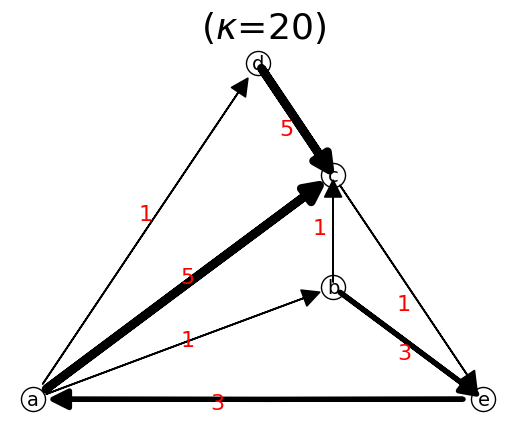

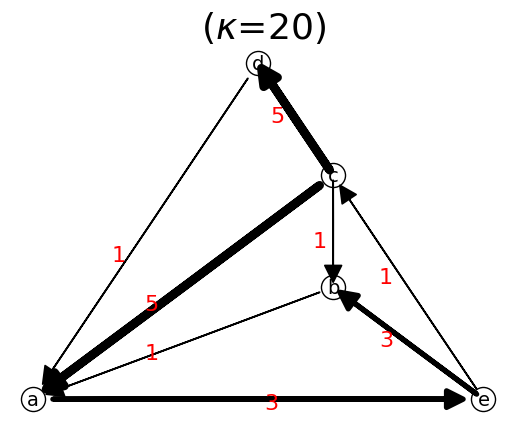

In [161]:
n = net.IFN()
n.add_link("a","b",1)
n.add_link("a","c",5)
n.add_link("a","d")
n.add_link("b","c")
n.add_link("b","e",3)
n.add_link("c","e",1)
n.add_link("d","c",5)
n.add_link("e","a",3)

nT=n.reverse_network()

n.show();
nT.show();

When we reverse the direction, the adjacency matrix is transposed.

In [162]:
F0,nodes0=n.get_matrix()
print('original network\n',F0,'\n')
F1,nodes1=nT.get_matrix()
print('reverse network\n',F1)

original network
 [[0, 1, 5, 1, 0], [0, 0, 1, 0, 3], [0, 0, 0, 0, 1], [0, 0, 5, 0, 0], [3, 0, 0, 0, 0]] 

reverse network
 [[0, 0, 0, 0, 3], [1, 0, 0, 0, 0], [5, 1, 0, 5, 0], [1, 0, 0, 0, 0], [0, 3, 1, 0, 0]]


## Path

### Find Path
Once we have define the network, we can get path from the network. Ths path is not necessarily the shortest path.

```python
n.find_path(startNode, endNode)
```

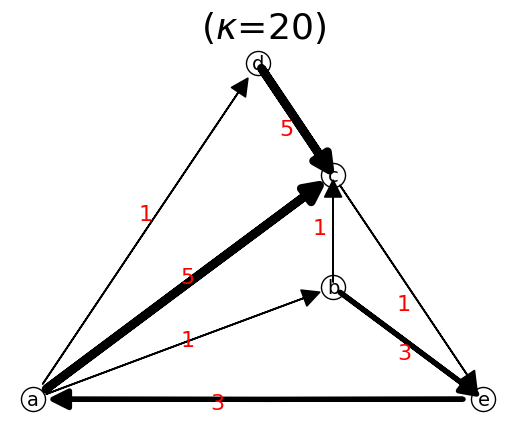

path a->e = ['a', 'b', 'c', 'e'] 



In [163]:
n.show();
print('path a->e =', n.find_path('a','e'),'\n')

If path does not exist, it return empty list

In [164]:
n.find_path('a','g')

[]

We cannot find path to itself because it would just return *itself*.

In [165]:
n.find_path('a','a')

['a']

### Find All Possible Paths

We can find all possible paths from a startNode to endNode
```python 
n.find_all_paths(startNode, endNode)
```

In [166]:
print('all paths a->e =\n', n.find_all_paths('a','e'))

all paths a->e =
 [['a', 'b', 'c', 'e'], ['a', 'b', 'e'], ['a', 'c', 'e'], ['a', 'd', 'c', 'e']]


### Shortest Path

We can also get the shortest path. Shortest path is a path with minimum number of links.
We can get the shortest path by *shortest_path* method
```python
n.shortest_path(startNode, endNode)
```

In [167]:
print('shortest path a->e =', n.shortest_path('a','e'),'\n')

shortest path a->e = ['a', 'b', 'e'] 



To get the total weights along the shortest path, we use
```python
n.path_distance(startNode, endNode)
```

In [168]:
n.path_distance('a','e')

4

If we know the path as node sequence (i.e. trajectory) then we can also get the the total weights along the trajectory.
```python
n.path_sum_weight(trajectory)
```

In [169]:
n.path_sum_weight(['a', 'b', 'c','e'])

3

### All Shortest Path
We can find all shortest path matrix.
```python
n.all_shortest_path()
```

*all_shortest_path* method produces a path matrix. The path matrix entries is the sum of link weights if there is a path and *inf* if no path exist.

In [170]:
print('all shortest path:')
n.all_shortest_path()

all shortest path:


([[6, 1, 2, 1, 3],
  [5, 6, 1, 6, 2],
  [4, 5, 6, 5, 1],
  [9, 10, 5, 10, 6],
  [3, 4, 5, 4, 6]],
 ['a', 'b', 'c', 'd', 'e'])

### Testing Path

Testing if a trajectory (i.e. node sequence) is a path
```python
n.is_path(trajectory)
```

In [171]:
print('is a->b->d a path?',n.is_path(['a','b','d']),'\n')

is a->b->d a path? False 



### Set Path

Let us set that node sequence as a path in the network by expanding the network.

In [172]:
n.set_path(['a','b','d'])

Now we can check if the same node sequence above is already a path.

is a->b->d a path? True 



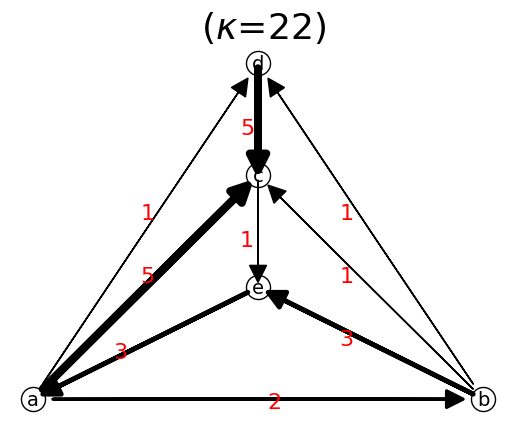

In [173]:
print('is a->b->d a path?',n.is_path(['a','b','d']),'\n')
n.show();

### Network Properties

The example below we also shows network properties after we define the network.

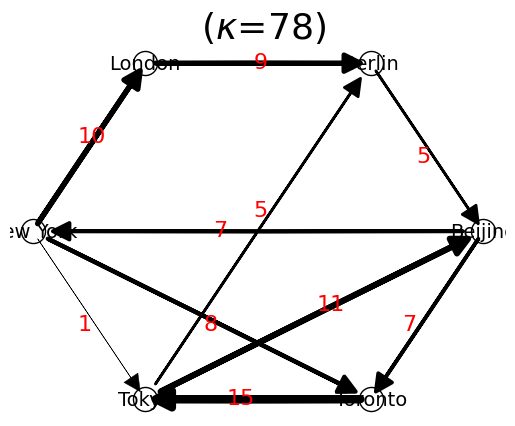

Network: {'Beijing': {'New York': 7, 'Toronto': 7}, 'New York': {'London': 10, 'Toronto': 8, 'Tokyo': 1}, 'London': {'Berlin': 9}, 'Berlin': {'Beijing': 5}, 'Toronto': {'Tokyo': 15}, 'Tokyo': {'Berlin': 5, 'Beijing': 11}}
Total Nodes: 6
Total Links: 10
List of Links: [['Beijing', 'New York'], ['Beijing', 'Toronto'], ['New York', 'London'], ['New York', 'Toronto'], ['New York', 'Tokyo'], ['London', 'Berlin'], ['Berlin', 'Beijing'], ['Toronto', 'Tokyo'], ['Tokyo', 'Berlin'], ['Tokyo', 'Beijing']]
List of Nodes: ['Beijing', 'Berlin', 'London', 'New York', 'Tokyo', 'Toronto']
Total Flow: 78
Network Entropy: 2.171231309893255
Coef. Variantion of Flow: 0.14707313230461527
Node Flow: {'Beijing': 14, 'New York': 19, 'London': 9, 'Berlin': 5, 'Toronto': 15, 'Tokyo': 16}
Link Flow from 'Tokyo' to 'Berlin' is 5
is_connected? True
is_strongly_connected? True
is_premagic? False
is ideal flow? False


In [174]:
import IdealFlow.Network as net     # import package.module as alias
n = net.IFN()
n.add_link("Beijing","New York",7)
n.add_link("New York","London",10)
n.add_link("London","Berlin",9)
n.add_link("New York","Toronto",8)
n.add_link("New York","Tokyo",1)
n.add_link("Tokyo","Berlin",5)
n.add_link("Tokyo","Beijing",11)
n.add_link("Beijing","Toronto",7)
n.add_link("Berlin","Beijing",5)
n.add_link("Toronto","Tokyo",15)
n.show("Circular");

# showing a few network properties
print('Network:', n)                          # string representation is an adjacency list
print('Total Nodes:',n.total_nodes)           # number of nodes
print('Total Links:',n.total_links)           # number of links
print('List of Links:',n.get_links)           # list of  links
print('List of Nodes:',n.nodes)           # list of  links
print('Total Flow:',n.total_flow)             # total flow
print('Network Entropy:',n.network_entropy)   # network entropy 
print('Coef. Variantion of Flow:',n.cov_flow) # coef. variation of flow
print('Node Flow:',n.nodes_flow)              # dictonary of {node name: sum of flow in node}
print("Link Flow from 'Tokyo' to 'Berlin' is",n.get_link_flow('Tokyo','Berlin'))  # specific link flow from and to node 
print("is_connected?",n.is_connected)         # undirected connectivity test
print("is_strongly_connected?",n.is_strongly_connected) # directed connectivity test
print("is_premagic?",n.is_premagic)           # balance of flow test
print('is ideal flow?',n.is_ideal_flow)       # ideal flow test
n                                             # network name 

As an exercise, can you balance the flows in the network above such that the sum of inflows is equal to the sum of ouflows?

## More Examples

Below are more several examples on how to create networks and showing its properties.

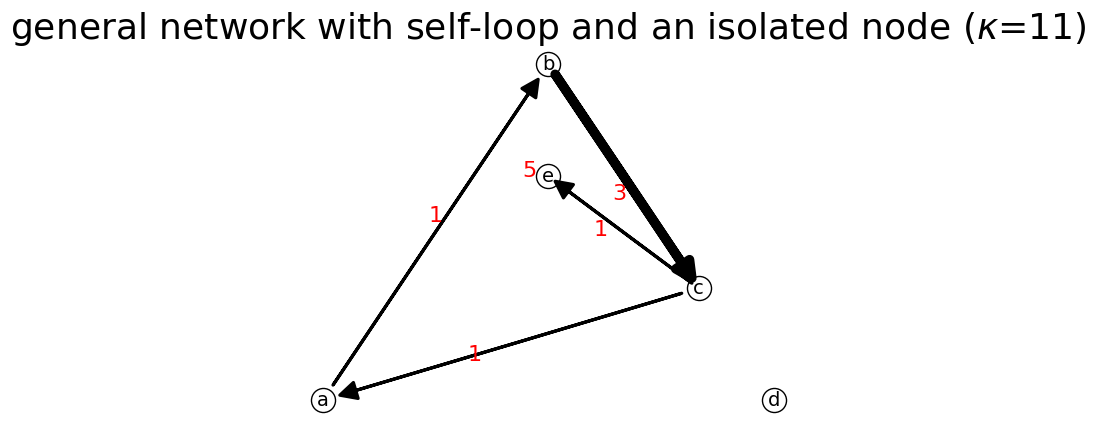

Network: {'a': {'b': 1}, 'b': {'c': 3}, 'c': {'a': 1, 'e': 1}, 'e': {'e': 5}, 'd': {}}
Total Nodes: 5
Total Links: 5
List of Links: [['a', 'b'], ['b', 'c'], ['c', 'a'], ['c', 'e'], ['e', 'e']]
List of Nodes: ['a', 'b', 'c', 'd', 'e']
Total Flow: 11
Node Flow: {'a': 1, 'b': 3, 'c': 2, 'e': 5, 'd': 0}
Link Flow from b to c is 3
is_connected? True
is_strongly_connected? False
is_premagic? False
is ideal flow? False


In [175]:
# example of any network, not necessarily ideal flow
n = net.IFN("general network with self-loop and an isolated node")

n.add_link('a','b')
n.add_link('b','c', 3)
n.add_link('c','a')
n.add_link('c','e')
n.add_link('e','e',5)     # we add self loop
n.add_node('d')           # we add a node alone
n.show();                # show the network

# showing network properties
print('Network:', n)                 # string representation is an adjacency list
print('Total Nodes:',n.total_nodes) # number of nodes
print('Total Links:',n.total_links) # number of links
print('List of Links:',n.get_links) # list of  links
print('List of Nodes:',n.nodes) # list of  links
print('Total Flow:',n.total_flow)   # total flow
print('Node Flow:',n.nodes_flow)     # dictonary of {node name: sum of flow in node}
print('Link Flow from b to c is',n.get_link_flow('b','c'))  # specific link flow from node 'b' to node 'c'
print("is_connected?",n.is_connected)         # undirected connectivity test
print("is_strongly_connected?",n.is_strongly_connected) # directed connectivity test
print("is_premagic?",n.is_premagic)           # balance of flow test 
print('is ideal flow?',n.is_ideal_flow)       # ideal flow test

Design Total Nodes: 5 
Design Total Links: 8
C= [[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]] 

Is Irreducible: True
Total Nodes: 5
Total Links: 8
List of Links: [['a', 'd'], ['b', 'a'], ['c', 'a'], ['c', 'b'], ['c', 'c'], ['c', 'd'], ['d', 'e'], ['e', 'c']]
List of Nodes: ['a', 'b', 'c', 'd', 'e']
totalFlow: 8.0
nodesFlow {'a': 1.0, 'b': 1.0, 'c': 4.0, 'd': 1.0, 'e': 1.0}


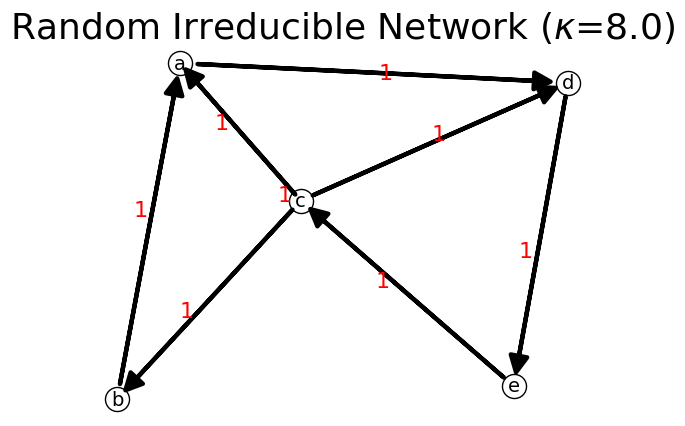

In [176]:
n = net.IFN("Random Irreducible Network")
numNode=5                         # number of nodes
numLink=numNode+int(3*numNode/4)  # number of links
print("Design Total Nodes:",numNode,'\nDesign Total Links:',numLink)

# using static methods to generate matrix and test matrix
C=n.rand_irreducible(numNode,numLink)        # generate random irreducible matrix
print("C=",C,'\n')
print('Is Irreducible:',n.is_irreducible_matrix(C)) # irreducibility test

listNodes=n.alphabet_list(numNode)  # generate list of alphabetical node names, or
# listNodes=range(1,numNode+1)        # generate list of numbers for node names
n.set_matrix(C,listNodes)          # put the matrix into network

# showing network properties
print('Total Nodes:',n.total_nodes) # number of nodes
print('Total Links:',n.total_links) # number of links
print('List of Links:',n.get_links) # list of  links
print('List of Nodes:',n.nodes) # list of  links
print('totalFlow:',n.total_flow)
print('nodesFlow',n.nodes_flow)
n.show(layout="Fruchterman");

Example of generating capacity matrix

In [177]:
# Example usage
from IdealFlow import Network as net

n = net.IFN("new example network")
k=9
m=k+int(3*k/4)        
C=n.rand_irreducible(k,m) # k nodes, m links
print("C=",C,'\n')

C= [[0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]] 



Example below would generate a capacity matrix, and convert it into adjacency matrix, stochastic matrix and ideal flow matrix and finally scaling the IFN into an integer IFN.

In [178]:
# another shorter way to access IFN
import IdealFlow.Network as net
n = net.IFN("random example network") 
k=4
m=k+int(3*k/4)        
C=n.rand_irreducible(k,m) # k nodes, m links
print("C=",C,'\n')
A=n.capacity_to_adjacency(C)
print("A=",A,'\n')
S=n.capacity_to_stochastic(C)
print("S=",S,'\n')
F=n.capacity_to_ideal_flow(C)
print("F=",F,'\n')
scaling=n.global_scaling(F,'int')
print('scaling:',scaling,'\n')
F1=n.equivalent_ifn(F, scaling)     
F1

C= [[0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]] 

A= [[0 0 1 1]
 [0 1 0 1]
 [0 1 0 1]
 [1 0 0 0]] 

S= [[0.  0.  0.5 0.5]
 [0.  0.5 0.  0.5]
 [0.  0.5 0.  0.5]
 [1.  0.  0.  0. ]] 

F= [[0.         0.         0.16666667 0.16666667]
 [0.         0.08333333 0.         0.08333333]
 [0.         0.08333333 0.         0.08333333]
 [0.33333333 0.         0.         0.        ]] 

scaling: 12 



array([[0., 0., 2., 2.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [4., 0., 0., 0.]])

In the example below, we manually created the netwok by adding links. 
Then we get the capacity matrix and list nodes.
We convert back the capacity matrix ino stochastic matrix.
We convert stochastic matrix into markov node flows $\pi$.
Then we compute ideal flow matrix from the stochastic matrix and node flow vector.
After that, we update the internal probability values before we show it.
Then we defne a node sequence as a trajectory and get its path entropy.
Based on the path entropy, we can find the match of ideal flow network name id.
The last features is useful when you have many IFNs and would like to select which IFN match with the trajectory.

In [179]:
import IdealFlow.Network as net

n = net.IFN("Test Network1")
print('n.name: ',n.name)
n.add_link("a","b",5)
n.add_link("b","c",1)
n.add_link("b","d",6)
n.add_link("c","e",1)
n.add_link("e","a",5)
n.add_link("e","b",2)
n.add_link("d","e",6)
print('adjacency list:',n)
print('is idealflow?',n.is_ideal_flow)
C,listNodes=n.get_matrix()
print('C',C)
print('listNodes',listNodes)
S=n.capacity_to_stochastic(C)
pi=n.markov(S)
print('pi:',pi)
F=n.ideal_flow(S, pi)
print('F:',F)
n.set_matrix(F,listNodes)
print('is idealflow?',n.is_ideal_flow)
print(n.network_prob)
n.network_probability                 # need to update network probability before output it
print(n.network_prob)
nodeSequence=["b","d","e","a","b"]
print("pathEntropy1",n.get_path_entropy(nodeSequence))
print(n.match(nodeSequence,{"abgh":n}),"\n")
print("net",n,"\n")
print("node values", n.nodes_flow)
print('max link flow=',n.max_flow)

n.name:  Test Network1
adjacency list: {'a': {'b': 5}, 'b': {'c': 1, 'd': 6}, 'c': {'e': 1}, 'd': {'e': 6}, 'e': {'a': 5, 'b': 2}}
is idealflow? True
C [[0, 5, 0, 0, 0], [0, 0, 1, 6, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 6], [5, 2, 0, 0, 0]]
listNodes ['a', 'b', 'c', 'd', 'e']
pi: [[0.19230769]
 [0.26923077]
 [0.03846154]
 [0.23076923]
 [0.26923077]]
F: [[0.         0.19230769 0.         0.         0.        ]
 [0.         0.         0.03846154 0.23076923 0.        ]
 [0.         0.         0.         0.         0.03846154]
 [0.         0.         0.         0.         0.23076923]
 [0.19230769 0.07692308 0.         0.         0.        ]]
is idealflow? True
{}
{'a': {'b': 0.19230769230769218}, 'b': {'c': 0.03846153846153843, 'd': 0.23076923076923062}, 'c': {'e': 0.03846153846153836}, 'd': {'e': 0.23076923076923095}, 'e': {'a': 0.19230769230769254, 'b': 0.07692307692307701}}
pathEntropy1 0.4727965657843897
('Test Network1', 1.0) 

net {'a': {'b': 0.1923076923076921}, 'b': {'c': 0.0384615384

In the network below, the initial network is an ideal flow, which is premagic and ireducible.



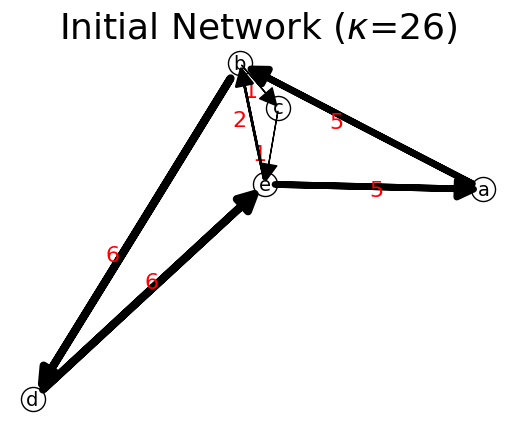

is_connected? True
is_strongly_connected? True
is_premagic? True
is idealflow? True
Network Probability:  {'a': {'b': 0.19230769230769232}, 'b': {'c': 0.038461538461538464, 'd': 0.23076923076923078}, 'c': {'e': 0.038461538461538464}, 'd': {'e': 0.23076923076923078}, 'e': {'a': 0.19230769230769232, 'b': 0.07692307692307693}}


In [180]:
# set up initial network
n = net.IFN("Initial Network")
n.add_link("a","b",5)
n.add_link("b","c",1)
n.add_link("b","d",6)
n.add_link("c","e",1)
n.add_link("e","a",5)
n.add_link("e","b",2)
n.add_link("d","e",6)
path = ["b","d","a","c","e"]              # path of unlearn
n.show(routes=path,layout="Kawai"); 

print("is_connected?",n.is_connected)         # undirected connectivity test
print("is_strongly_connected?",n.is_strongly_connected) # directed connectivity test
print("is_premagic?",n.is_premagic)           # balance of flow test
print('is idealflow?',n.is_ideal_flow)        # irreducible and premagic
n.network_probability                 # need to update network probability before output it
print('Network Probability: ',n.network_prob)

Then we set a path where the network is unlearned. It means along the path, the flow would be subtracted by one.
When the flow is initially one, then the link that contains zero flow would be removed from the network.
The result is weakly connected network with a sink node `c`.



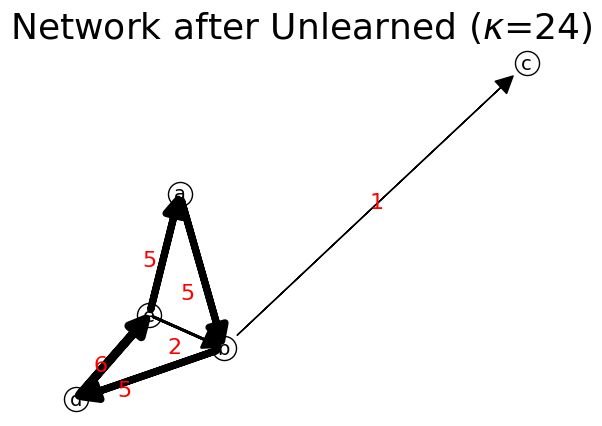

is_connected? True
is_strongly_connected? False
is_premagic? False
is idealflow? False
is premagic network? False
is irreducible matrix? False
is premagic matrix? False
is ideal flow matrix? False
Network Probability:  {'a': {'b': 0.20833333333333331}, 'b': {'c': 0.041666666666666664, 'd': 0.20833333333333331}, 'd': {'e': 0.25}, 'e': {'a': 0.20833333333333331, 'b': 0.08333333333333333}}


In [181]:
adjList = n.get_data()                     # get adjacency list of initial network 
n1 = net.IFN("Network after Unlearned")   # create new network
n1.set_data(adjList)                        # copy data from Initial Network
n1.unlearn(path)                          # unlearn
n1.show(layout="Spring");
print("is_connected?",n1.is_connected)         # undirected connectivity test
print("is_strongly_connected?",n1.is_strongly_connected) # directed connectivity test
print("is_premagic?",n1.is_premagic)           # balance of flow test
print('is idealflow?',n1.is_ideal_flow)   # after unlearn, it is no longer ideal flow
print('is premagic network?',n1.is_premagic)

C,listNodes=n1.get_matrix()
print('is irreducible matrix?',n1.is_irreducible_matrix(C))   # not ideal flow because not irreducible
print('is premagic matrix?',n1.is_premagic_matrix(C))
print('is ideal flow matrix?',n1.is_ideal_flow_matrix(C))

n1.network_probability                 # need to update network probability before output it
print('Network Probability: ',n1.network_prob)

The next code is to demonstrate that Weakly Connected Network cannot become IFN. Due to the existence of the sink node, the stochastic matrix contains zero row. The matrix is reducible. Therefore, it cannot be transformed into an ideal flow network.



S [[0.         1.         0.         0.         0.        ]
 [0.         0.         0.16666667 0.83333333 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.71428571 0.28571429 0.         0.         0.        ]] 

F= [[ 0.         19.04167548  0.          0.          0.        ]
 [ 0.          0.          4.54622382 22.7311191   0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         23.93801565]
 [17.92363021  7.16945208  0.          0.          0.        ]] 



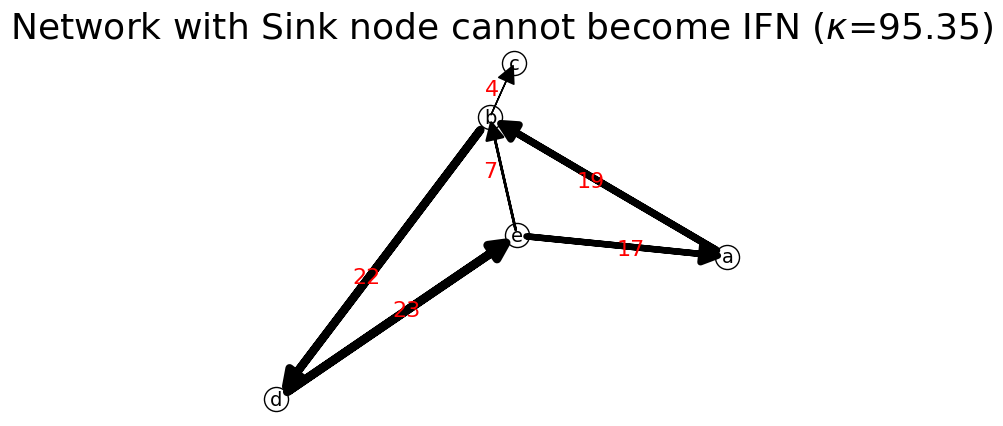

is_connected? True
is_strongly_connected? False
is_premagic? False
is idealflow? False
Network Probability:  {'a': {'b': 0.19970269790557324}, 'b': {'c': 0.04767926872559459, 'd': 0.23839634362797296}, 'c': {}, 'd': {'e': 0.2510538693645723}, 'e': {'a': 0.18797701455449065, 'b': 0.07519080582179624}}


In [182]:
n2 = net.IFN("Network with Sink node cannot become IFN")   # create new network
S=n2.capacity_to_stochastic(C)
print('S',S,'\n')
F=n2.stochastic_to_ideal_flow(S,100)
print('F=',F,'\n')

n2.set_matrix(F,listNodes)
n2.show(layout="Kawai");

print("is_connected?",n2.is_connected)         # undirected connectivity test
print("is_strongly_connected?",n2.is_strongly_connected) # directed connectivity test
print("is_premagic?",n2.is_premagic)           # balance of flow test
print('is idealflow?',n2.is_ideal_flow)
n2.network_probability              # need to update network probability before output it
print('Network Probability: ',n2.network_prob)


Network below contains source node `c`. Due to the existence of the *source node* , the stochastic matrix contains zero column. The matrix is reducible. Therefore, it cannot be transformed into an ideal flow network.

S.T [[0.         0.         0.         0.         0.71428571]
 [1.         0.         0.         0.         0.28571429]
 [0.         0.16666667 0.         0.         0.        ]
 [0.         0.83333333 0.         0.         0.        ]
 [0.         0.         0.         1.         0.        ]] 

F= [[ 0.          0.          0.          0.         17.41491065]
 [23.45557664  0.          0.          0.          6.70159333]
 [ 0.          0.0461331   0.          0.          0.        ]
 [ 0.         22.08081013  0.          0.          0.        ]
 [ 0.          0.          0.         25.33441793  0.        ]] 



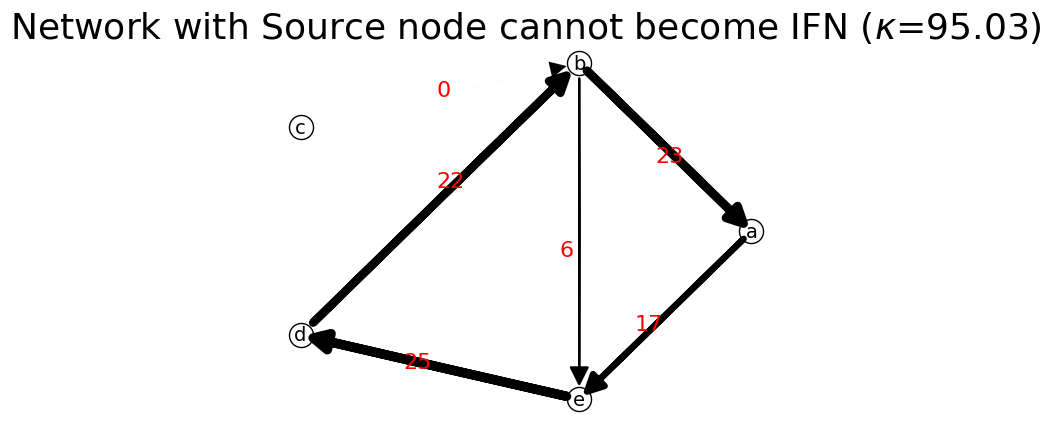

is_connected? True
is_strongly_connected? False
is_premagic? False
is idealflow? False
Network Probability:  {'a': {'e': 0.1832503413653255}, 'b': {'a': 0.24681392362927387, 'e': 0.07051826389407824}, 'c': {'b': 0.0004854407405646304}, 'd': {'b': 0.23234778956044813}, 'e': {'d': 0.26658424081030957}}


In [183]:
n3 = net.IFN("Network with Source node cannot become IFN")   # create new network
St=S.T
print('S.T',St,'\n')
F=n2.stochastic_to_ideal_flow(St,100)
print('F=',F,'\n')

n3.set_matrix(F,listNodes)
n3.show(layout=None);
print("is_connected?",n3.is_connected)         # undirected connectivity test
print("is_strongly_connected?",n3.is_strongly_connected) # directed connectivity test
print("is_premagic?",n3.is_premagic)           # balance of flow test
print('is idealflow?',n3.is_ideal_flow)
n3.network_probability            # need to update network probability before output it
print('Network Probability: ',n3.network_prob)


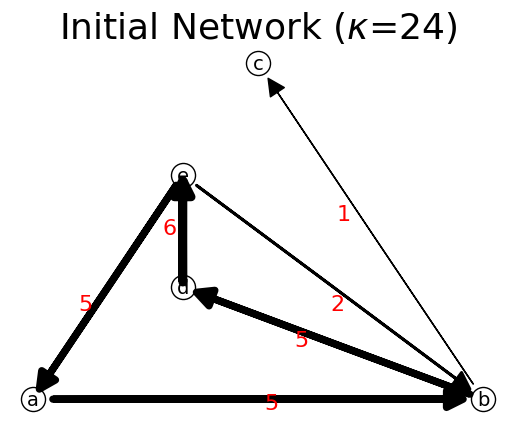

pathEntropy 0
('Initial Network', 0) 

network: {'a': {'b': 5}, 'b': {'c': 1, 'd': 5}, 'd': {'e': 6}, 'e': {'a': 5, 'b': 2}} 

node values: {'a': 5, 'b': 6, 'd': 6, 'e': 7}
max link flow= 6


In [184]:
n.show()

nodeSequence=["b","d","e","a","b","c","d"]
print("pathEntropy",n.get_path_entropy(nodeSequence))
print(n.match(nodeSequence,{"abgh":n}),"\n")
print("network:",n,"\n")
print("node values:", n.nodes_flow)
print('max link flow=',n.max_flow)

Now let us create a random irreducible network and do some testings 

C: [[0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0.]] 

is irreducible matrix? True
is premagic matrix? False
is ideal flow matrix? False
is_connected? True
is_strongly_connected? True
is_premagic? False
is ideal flow? False
{'a': {'c': 1.0}, 'b': {'a': 1.0, 'b': 1.0}, 'c': {'e': 1.0}, 'd': {'b': 1.0, 'd': 1.0}, 'e': {'a': 1.0, 'd': 1.0}}


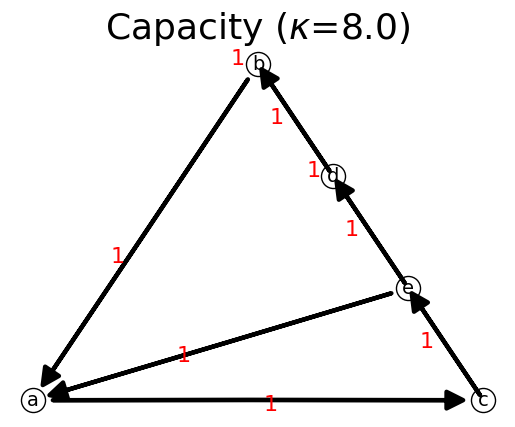

In [185]:
n = net.IFN("Capacity")         # create new network
k=5                        # number of nodes
m=k+int(3*k/4)             # number of links
C=n.rand_irreducible(k,m)   # generate random irreducible matrix
print("C:",C,"\n")
print('is irreducible matrix?',n.is_irreducible_matrix(C))   # not ideal flow because not irreducible
print('is premagic matrix?',n.is_premagic_matrix(C))
print('is ideal flow matrix?',n.is_ideal_flow_matrix(C))
n.set_matrix(C)
print("is_connected?",n.is_connected)         # undirected connectivity test
print("is_strongly_connected?",n.is_strongly_connected) # directed connectivity test
print("is_premagic?",n.is_premagic)           # balance of flow test
print('is ideal flow?',n.is_ideal_flow)       # ideal flow test
print(n)
n.show();


Let us create a new network that would balance the flow in each nodes such that the sum of inflows would be equal to the sum of outflows.

In [186]:

n = net.IFN("IFN")         # create new network
F1=n.capacity_to_ideal_flow(C,1)
scaling= n.global_scaling(F1,'int')
F=n.equivalent_ifn(F1,scaling)
print("F:",F,"\n")
print('is irreducible matrix?',n.is_irreducible_matrix(F))   # not ideal flow because not irreducible
print('is premagic matrix?',n.is_premagic_matrix(F))
print('is ideal flow matrix?',n.is_ideal_flow_matrix(F))

F: [[0. 0. 2. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 2.]
 [0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0.]] 

is irreducible matrix? True
is premagic matrix? True
is ideal flow matrix? True


Ideal Flow Network 
-----------------------
Having a network does not mean it is Ideal Flow Network (IFN)

C: [[0. 0. 4. 1. 0.]
 [7. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4.]
 [0. 0. 1. 0. 0.]
 [0. 6. 0. 0. 0.]]
F: [[0. 0. 4. 1. 0.]
 [5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 1. 0. 0.]
 [0. 5. 0. 0. 0.]]


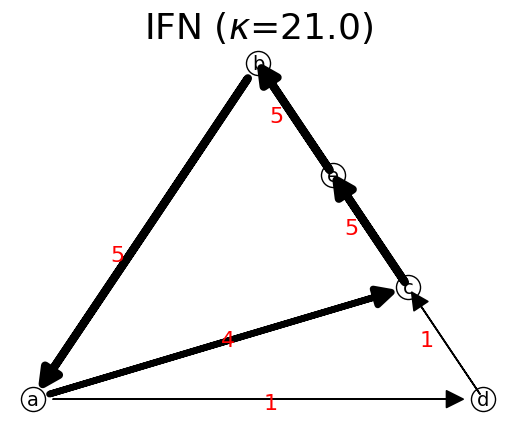

In [187]:

n = net.IFN("IFN")         # create new network
C=n.rand_capacity()
print('C:',C)
F1=n.capacity_to_ideal_flow(C,1)
scaling= n.global_scaling(F1,'min',1)
F=n.equivalent_ifn(F1,scaling)

print('F:',F)
n.set_matrix(F,['a','b','c','d','e'])
n.show();

Let us do it step by step.

First, let us test if the network is an ideal flow network

In [188]:
print('is Ideal Flow?',n.is_ideal_flow,'\n')

is Ideal Flow? True 



An ideal flow network must be both strongly connected and premagic. Let us test whether it is strongly connected

In [189]:
print('is strongly connected?',n.is_strongly_connected,'\n')

is strongly connected? True 



Let us test if the flows are balance in each node

In [190]:
print('is premagic?',n.is_premagic,'\n')

is premagic? True 



To make strongly connected network into ideal flow network, first, let us assume the existing weight as capacity matrix

In [191]:
C,list_node=n.get_matrix()
print('list_node:',list_node)
C

list_node: ['a', 'b', 'c', 'd', 'e']


[[0, 0, 4.0000000000000195, 1.0000000000000049, 0],
 [5.000000000000026, 0, 0, 0, 0],
 [0, 0, 0, 0, 5.000000000000024],
 [0, 0, 1.0, 0, 0],
 [0, 5.000000000000026, 0, 0, 0]]

Then we compute the ideal flow and scale it to integer

In [192]:
F1=n.capacity_to_ideal_flow(C)
scaling= n.global_scaling(F1,'min',1)
F=n.equivalent_ifn(F1,scaling)

print('F =',F,'\n')

F = [[0. 0. 4. 1. 0.]
 [5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 1. 0. 0.]
 [0. 5. 0. 0. 0.]] 



We replace the adjacency list of the network with the ideal flow matrix F. we can see the flow is in equilibrium such that total inflow is equal total outflow in each node.

is Ideal Flow? True 



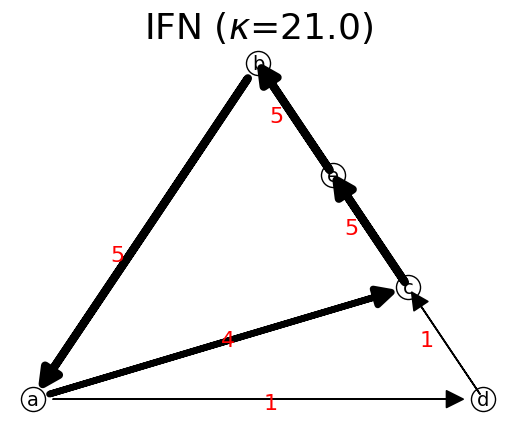

In [193]:
n.set_matrix(F,list_node)
print('is Ideal Flow?',n.is_ideal_flow,'\n')
n.show(); 